## Model-based and model-free Reinforcement Learning on Gridworld Problem

We are showing 4 methods here:
1. Value Iteration - Model-based algorithm
2. Policy Iteration - Model-based algorithm
3. Temporal Difference Learning(1 step look-ahead) - Model-free algorithm
4. Temporal Difference-lambda Learning(n step look-ahead) - Model-free algorithm

### Value Iteration

In [7]:
"""
This file demonstrates Value Iteration on the GridWorld problem
Falls under: Model-based algorithms
Are state transitions stochastic: No (deterministic upon taking an action)
Initial policy: Uniform random( other policies can be added later)
Initial Value function: All 0s
Reward function: -1 for every step taken( other reward functions can be added later). Also, the rewards are dependent
                 only on the actions, not on the states
Terminal state(s): Top left corner and bottom right. Other terminal states can be added by harding them in the
                   following 2 places in the code:
                   TODO: 1)
                   TODO: 2)

Note how the policy we arrive at is sensitive to the convergence value and the size of the grid. As the size of the grid
increases, the convergence value needs to be made smaller to arrive at the true optimal policy. Otherwise, the
iterations end at a stage where there is more than one optimal action for some state( one of them might not actually be
optimal, its just that we converged, rather, stopped evaluating too early to realize that it wasn't an optimal action
for that state)
"""

import numpy as np

print("Value iteration: GridWorld : Top-left and bottom-right corners are the terminal state")

n = int(input("No of rows: "))
m = int(input("No of cols: "))

threshold = float(input("Threshold for value function convergence"))

"""
This function is used to modify the reward function.
A simple reward function is -1 reward for any direction chosen.
Modify the values from -1 to any other value for custom rewards for the directions
"""


def get_reward_function():
    # Note: The actions are assumed to be in the format: [up, down, right, left]
    reward = list()
    reward.append(-1)  # up
    reward.append(-1)  # down
    reward.append(-1)  # right
    reward.append(-1)  # left

    reward = np.array(reward)
    return reward


"""
This function is used to calculate the expected value function
given the set of rewards for every action, reward function and a policy.
To account for the first iteration( our initial policy), the default policy is uniform random.
"""


def get_optimal_value_fnc(values, reward, policy=None):
    if policy is None:  # policy is uniform random
        pdf = 0.25 * np.ones((4, ))
        expected_value = pdf * (reward + values)
        return np.max(expected_value)  # the optimal value function for this state is the max. of all the values of
        #  states we might end up in from this state


"""
This function gives the value of adjacent states for a given state
"""


def get_adjacent_indices(i, j, n, m):
    positions = list()

    # up
    positions.append([i, j]) if i == 0 else positions.append([i - 1, j])

    # down
    positions.append([i, j]) if i == (n - 1) else positions.append([i + 1, j])

    # right
    positions.append([i, j]) if j == (m - 1) else positions.append([i, j + 1])

    # left
    positions.append([i, j]) if j == 0 else positions.append([i, j - 1])

    positions = np.array(positions)
    return positions


grid_world = np.zeros((n, m))  # holds value function
rewards = get_reward_function()

# evaluate the value function ( 1st iteration)
for i in range(n):
    for j in range(m):
        if i == 0 and j == 0:  # top-left corner of the grid
            grid_world[i][j] = 0

        else:
            positions = get_adjacent_indices(i, j, n, m)

            values = np.array(
                [grid_world[positions[0][0]][positions[0][1]], grid_world[positions[1][0]][positions[1][1]],
                 grid_world[positions[2][0]][positions[2][1]], grid_world[positions[3][0]][positions[3][1]]])

            grid_world[i][j] = get_optimal_value_fnc(values, rewards)

new_grid_world = np.zeros((n, m))

diff = grid_world - new_grid_world
mse = np.sqrt(np.sum(np.square(diff)))

while mse > threshold:
    new_grid_world = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            if i == 0 and j == 0:  # top-left corner of the grid
                grid_world[i][j] = 0
            elif i == (n - 1) and j == (m - 1):  # bottom-right corner of the grid
                grid_world[i][j] = 0
            # TODO: 1) add as many terminal states as you want here
            else:
                positions = get_adjacent_indices(i, j, n, m)

                values = np.array([grid_world[positions[0][0]][positions[0][1]], grid_world[positions[1][0]][positions[1][1]],
                                   grid_world[positions[2][0]][positions[2][1]], grid_world[positions[3][0]][positions[3][1]]])

                new_grid_world[i][j] = get_optimal_value_fnc(values, rewards)

    mse = np.sqrt(np.sum(np.square(grid_world - new_grid_world)))
    grid_world = new_grid_world

    # now our value function is ready, let's act greedily based on that and form a policy
    # the initial policy is: go in any of the directions( though this is not explicitly mentioned)
    # with iterations, we become more specific with which actions put us in a "better" state
    # we stop evaluating the value function when we narrow down to one action for every state
    # beyond this iteration, there is no point in improving the value function as the policy has converged.

    # print(grid_world)

print("Value function has converged \n")

print("Policy: ")
action_dictionary = {0: 'up', 1: 'down', 2: 'right', 3: 'left'}
policy = []
for i in range(n):
    row_list = []
    for j in range(m):
        positions = get_adjacent_indices(i, j, n, m)

        values = np.array([grid_world[positions[0][0]][positions[0][1]], grid_world[positions[1][0]][positions[1][1]],
                           grid_world[positions[2][0]][positions[2][1]], grid_world[positions[3][0]][positions[3][1]]])

        max_pos = np.argwhere(values == np.amax(values)).flatten()

        if i == 0 and j == 0:  # top-left
            row_list.append("X")
        elif i == (n - 1) and j == (m - 1):  # bottom-right
            row_list.append("X")
        # TODO: 2) add as many terminal states as you want here
        else:
            if max_pos.shape[0] == 1:  # policy has converged for this state
                row_list.append(action_dictionary[max_pos[0]])

            else:
                g = []
                for t in range(max_pos.shape[0]):
                    g.append(action_dictionary[max_pos[t]] + "/")
                row_list.append(g)

    policy.append(row_list)
    print(row_list)

# print(policy)

print("\n\nDo note that for some states, the policy might not have converged due to a high threshold, or there might"
      " be more than one optimal action for that state")


Value iteration: GridWorld : Top-left and bottom-right corners are the terminal state
No of rows: 4
No of cols: 4
Threshold for value function convergence0.00001
Value function has converged 

Policy: 
['X', 'left', 'left', ['down/', 'left/']]
['up', ['up/', 'left/'], ['up/', 'down/', 'right/', 'left/'], 'down']
['up', ['up/', 'down/', 'right/', 'left/'], ['down/', 'right/'], 'down']
[['up/', 'right/'], 'right', 'right', 'X']


Do note that for some states, the policy might not have converged due to a high threshold, or there might be more than one optimal action for that state


### Policy Iteration

In [8]:
"""
This file demonstrates Policy Iteration on the GridWorld problem
Falls under: Model-based algorithms
Are state transitions stochastic: No (deterministic upon taking an action)
Initial policy: Uniform random( other policies can be added later)
Initial Value function: All 0s
Reward function: -1 for every step taken( other reward functions can be added later). Also, the rewards are dependent
                 only on the actions, not on the states
Terminal state: Top left corner and bottom right. Other terminal states can be added by hard-coding them in the
                   following 4 places in the code:
                   TODO: 1)
                   TODO: 2)
                   TODO: 3)
                   TODO: 4)
                   Side note: Hard-coding is certainly not good design , but it's sufficient to demonstrate this simple
                   problem
"""

import numpy as np

print("Policy iteration: GridWorld : Top-left and bottom-right corners are the terminal state")

n = int(input("No of rows: "))
m = int(input("No of cols: "))

"""
This function is used to modify the reward function.
A simple reward function is -1 reward for any direction chosen.
Modify the values from -1 to any other value for custom rewards for the directions
"""


def get_reward_function():
    # Note: The actions are assumed to be in the format: [up, down, right, left]
    # modify the rewards if needed
    reward = list()
    reward.append(-1)  # up
    reward.append(-1)  # down
    reward.append(-1)  # right
    reward.append(-1)  # left

    reward = np.array(reward)
    return reward


"""
This function is used to calculate the expected value function
given the set of rewards for every action, reward function and a policy.
To account for the first iteration( our initial policy), the default policy is uniform random.
"""


def get_expected_value_fnc(values, reward, policy=None):
    if policy is None:  # policy is uniform random
        pdf = 0.25 * np.ones((4, ))
        expected_value = pdf * (reward + values)
        return np.sum(expected_value)


"""
This function gives the value of adjacent states for a given state
"""


def get_adjacent_indices(i, j, n, m):
    positions = list()

    # up
    positions.append([i, j]) if i == 0 else positions.append([i - 1, j])

    # down
    positions.append([i, j]) if i == (n - 1) else positions.append([i + 1, j])

    # right
    positions.append([i, j]) if j == (m - 1) else positions.append([i, j + 1])

    # left
    positions.append([i, j]) if j == 0 else positions.append([i, j - 1])

    positions = np.array(positions)
    return positions


"""
This function compares the new policy and previous policy for every state.
returns: True if there is a change in policy in at least one state
         False if the 2 policies are exactly the same
"""


def has_changed(previous_policy, current_policy):
    for x in range(len(previous_policy)):
        for y in range(len(previous_policy[0])):
            if not set(previous_policy[x][y]) == set(current_policy[x][y]):
                return True
    return False


grid_world = np.zeros((n, m))  # holds value function
rewards = get_reward_function()

action_dictionary = {0: 'up', 1: 'down', 2: 'right', 3: 'left'}
current_policy = []
for i in range(n):
    new_list = []
    for j in range(m):
        if i == 0 and j == 0:  # top-left corner of the grid
            new_list.append([5])
        elif i == (n - 1) and j == (m - 1):  # bottom-right corner of the grid
            new_list.append([5])
        # TODO: 1) add as many terminal states as you want here
        else:
            new_list.append([0, 1, 2, 3])

    current_policy.append(new_list)

new_policy = []
while True:
    new_grid_world = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            if i == 0 and j == 0:  # top-left corner of the grid
                grid_world[i][j] = 0
            elif i == (n - 1) and j == (m - 1):  # bottom-right corner of the grid
                grid_world[i][j] = 0
            # TODO: 2) add as many terminal states as you want here
            else:
                positions = get_adjacent_indices(i, j, n, m)

                values = np.array([grid_world[positions[0][0]][positions[0][1]], grid_world[positions[1][0]][positions[1][1]],
                                   grid_world[positions[2][0]][positions[2][1]], grid_world[positions[3][0]][positions[3][1]]])

                new_grid_world[i][j] = get_expected_value_fnc(values, rewards)

                # now our value function is ready, let's act greedily based on that and form a policy
                # the initial policy is: go in any of the directions( though this is not explicitly mentioned)
                # with iterations, we become more specific with which actions put us in a "better" state

    new_policy = []
    for i in range(n):
        new_list = []
        for j in range(m):
            positions = get_adjacent_indices(i, j, n, m)

            new_values = np.array(
                [new_grid_world[positions[0][0]][positions[0][1]], new_grid_world[positions[1][0]][positions[1][1]],
                 new_grid_world[positions[2][0]][positions[2][1]], new_grid_world[positions[3][0]][positions[3][1]]])

            # print("new values from new gridworld:", new_values, i, j)
            max_pos = np.argwhere(new_values == np.amax(new_values)).flatten()
            # print("max value from new gridworld:", max_pos, i, j)

            if i == 0 and j == 0:  # top-left corner of the grid
                new_list.append([5])  # terminal states append 5
            elif i == (n - 1) and j == (m - 1):  # bottom-right corner of the grid
                new_list.append([5])  # terminal states append 5
            # TODO: 3) add as many terminal states as you want here
            else:
                g = []
                for t in range(max_pos.shape[0]):
                    g.append(max_pos[t])
                new_list.append(g)

        new_policy.append(new_list)

    # we stop evaluating the value function when we narrow down to one action for every state
    # beyond this iteration, there is no point in improving the value function as the policy has converged.
    # OR IN A GENERIC CASE
    # when we see that the policy remains the same over 2 consecutive iterations.

    # print("current_policy:", current_policy)
    # print("new_policy:", new_policy)

    if not has_changed(current_policy, new_policy):
        break

    grid_world = new_grid_world
    current_policy = new_policy

    # print(grid_world)
    # print("-----------")

print("Grid world policy function: ")
print(grid_world)

print("\n Policy: ")
# POLICY
policy = []
for i in range(n):
    row_list = []
    for j in range(m):
        positions = get_adjacent_indices(i, j, n, m)

        values = np.array([grid_world[positions[0][0]][positions[0][1]], grid_world[positions[1][0]][positions[1][1]],
                           grid_world[positions[2][0]][positions[2][1]], grid_world[positions[3][0]][positions[3][1]]])

        max_pos = np.argwhere(values == np.amax(values)).flatten()

        if i == 0 and j == 0:  # top-left
            row_list.append("X")
        elif i == (n - 1) and j == (m - 1):  # bottom-right
            row_list.append("X")
        # TODO: 4) add as many terminal states as you want here
        else:
            if max_pos.shape[0] == 1:  # policy has converged for this state
                row_list.append(action_dictionary[max_pos[0]])

            else:
                g = []
                for t in range(max_pos.shape[0]):
                    g.append(action_dictionary[max_pos[t]] + "/")
                row_list.append(g)

    policy.append(row_list)
    print(row_list)



Policy iteration: GridWorld : Top-left and bottom-right corners are the terminal state
No of rows: 4
No of cols: 4
Grid world policy function: 
[[ 0.     -2.4375 -2.9375 -3.    ]
 [-2.4375 -2.875  -3.     -2.9375]
 [-2.9375 -3.     -2.875  -2.4375]
 [-3.     -2.9375 -2.4375  0.    ]]

 Policy: 
['X', 'left', 'left', ['down/', 'left/']]
['up', ['up/', 'left/'], ['down/', 'left/'], 'down']
['up', ['up/', 'right/'], ['down/', 'right/'], 'down']
[['up/', 'right/'], 'right', 'right', 'X']


### TD Learning

Enter the discount factor: 0.99
Enter the update factor: 0.1
How many episodes? 100
Policy: 
up
up
up
right
right
right
right
right
down
down
down
down


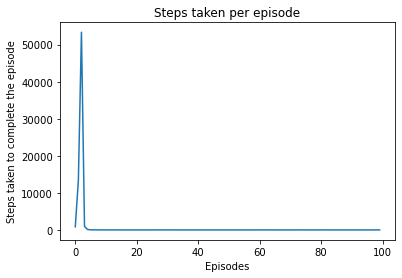

In [4]:
"""
SARSA is the model free control technique of using TD(0) for policy evaluation and GLIE for policy improvement.
In GLIE, the epsilon value( the value that controls the probability with which a random action is chosen v/s the greedy
action is hyperbolically degraded as more episodes are seen. This ensures that we explore more initially and get greedy
when we pick actions as we see more episodes. We can also use a constant epsilon and
compare the 2 scenarios.

It displays:
1) The steps that need to be taken to reach the goal
2) Graph of no of steps it took to complete the episode v/s episode no
"""

import numpy as np
import environment
import random
from matplotlib import pyplot as plt

sequence = []
env = environment.GridWorld8x8()
actions = [0, 1, 2, 3]
iteration = 0

# initializing q values
q = np.zeros((env.m, env.n, len(env.actions)))

discount_factor = float(input("Enter the discount factor: "))  # gamma
update_factor = float(input("Enter the update factor: "))  # alpha

episodes = int(input("How many episodes? "))


def get_action(rand_or_greedy, m, n):
    if rand_or_greedy == 0:  # random
        return random.choice(actions)

    else:  # greedy
        return np.argmax(q[m][n])


steps = []
for episode in range(episodes):
    # defining epsilon: used to implement GLIE
    # 0 means random, 1 means greedy action will be chosen.
    # So, 0 -> epsilon 1 -> (1 - epsilon)

    epsilon = 1 / (episode + 1)

    current_state = env.starting_point

    random_or_greedy = np.random.choice(np.arange(0, 2), p=[epsilon, (1 - epsilon)])
    action = get_action(random_or_greedy, current_state[0], current_state[1])
    step_count = 0

    while True:
        reward, next_state, terminal_state = env.take_action(current_state[0], current_state[1], action)

        random_or_greedy = np.random.choice(np.arange(0, 2), p=[epsilon, (1 - epsilon)])
        action_dash = get_action(random_or_greedy, next_state[0], next_state[1])

        q[current_state[0]][current_state[1]][action] += update_factor * (reward + discount_factor *
                        q[next_state[0]][next_state[1]][action_dash] - q[current_state[0]][current_state[1]][action])

        current_state = next_state
        action = action_dash

        step_count += 1

        if terminal_state:
            steps.append(step_count)
            break

# POLICY:
print("Policy: ")
current_state = env.starting_point
while True:
    action = np.argmax(q[current_state[0]][current_state[1]])
    # print(current_state)
    if action == 0:
        print("up")
    elif action == 1:
        print("down")
    elif action == 2:
        print("right")
    else:
        print("left")

    reward, next_state, terminal_state = env.take_action(current_state[0], current_state[1], action)
    current_state = next_state

    if terminal_state:
        break

plt.plot(range(episodes), steps)
plt.xlabel("Episodes")
plt.ylabel("Steps taken to complete the episode")
plt.title("Steps taken per episode")
plt.show()


### TD(lambda) Learning

Enter the discount factor: 0.99
Enter the update factor: 0.1
Enter lambda, the factor that decays the eligibility traces: 0.1
How many episodes? 10
Policy: 
up
right
right
right
right
right
down
right
down
down
down
down
down
left


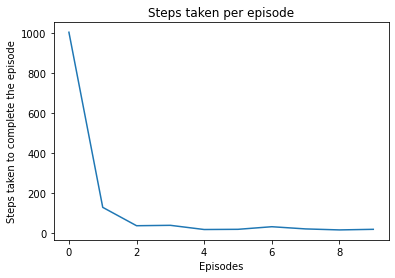

In [6]:
"""
SARSA(lam) is the model free control technique of using TD(lam) for policy evaluation and GLIE for policy improvement.
In GLIE, the epsilon value( the value that controls the probability with which a random action is chosen v/s the greedy
action is hyperbolically degraded as more episodes are seen.  This ensures that we explore more initially and get greedy
when we pick actions as we see more episodes. We can also use a constant epsilon and
compare the 2 scenarios.

It displays:
1) The steps that need to be taken to reach the goal
2) Graph of no of steps it took to complete the episode v/s episode no
"""

import numpy as np
import environment
import random
from matplotlib import pyplot as plt

sequence = []
env = environment.GridWorld8x8()
actions = [0, 1, 2, 3]
iteration = 0

# initializing q values
q = np.zeros((env.m, env.n, len(env.actions)))
e = np.zeros((env.m, env.n, len(env.actions)))

discount_factor = float(input("Enter the discount factor: "))  # gamma
update_factor = float(input("Enter the update factor: "))  # alpha
lam = float(input("Enter lambda, the factor that decays the eligibility traces: "))

episodes = int(input("How many episodes? "))


def get_action(rand_or_greedy, m, n):
    if rand_or_greedy == 0:  # random
        return random.choice(actions)

    else:  # greedy
        return np.argmax(q[m][n])


steps = []
for episode in range(episodes):
    # defining epsilon: used to implement GLIE
    # 0 means random, 1 means greedy action will be chosen.
    # So, 0 -> epsilon 1 -> (1 - epsilon)

    e = np.zeros((env.m, env.n, len(env.actions)))

    epsilon = 1 / (episode + 1)

    current_state = env.starting_point

    random_or_greedy = np.random.choice(np.arange(0, 2), p=[epsilon, (1 - epsilon)])
    action = get_action(random_or_greedy, current_state[0], current_state[1])
    step_count = 0

    while True:
        reward, next_state, terminal_state = env.take_action(current_state[0], current_state[1], action)

        e[current_state[0]][current_state[1]][action] += 1

        random_or_greedy = np.random.choice(np.arange(0, 2), p=[epsilon, (1 - epsilon)])
        action_dash = get_action(random_or_greedy, next_state[0], next_state[1])

        delta = reward + discount_factor * q[next_state[0]][next_state[1]][action_dash] - q[current_state[0]][current_state[1]][action]

        for i in range(env.m):
            for j in range(env.n):
                for k in range(len(env.actions)):
                    q[i][j][k] += update_factor * delta * e[i][j][k]
                    e[i][j][k] *= (discount_factor * lam)

        current_state = next_state
        action = action_dash
        step_count += 1

        if terminal_state:
            steps.append(step_count)
            break

# POLICY:
print("Policy: ")
current_state = env.starting_point
while True:
    action = np.argmax(q[current_state[0]][current_state[1]])
    # print(current_state)
    if action == 0:
        print("up")
    elif action == 1:
        print("down")
    elif action == 2:
        print("right")
    else:
        print("left")

    reward, next_state, terminal_state = env.take_action(current_state[0], current_state[1], action)
    current_state = next_state

    if terminal_state:
        break

plt.plot(range(episodes), steps)
plt.xlabel("Episodes")
plt.ylabel("Steps taken to complete the episode")
plt.title("Steps taken per episode")
plt.show()


### Inference
<p>Once the agent finds the path with shortest path, the number of iterations required to complete the episode and reach the goal sharply</p>